**Códigos usados para explicar como resolver problemas de valor de contorno (PVC), muito comuns em mecânica quântica.**

O hamiltoniano do problema é o do poco de potencial infinito e o método utilizado é o shooting method.

In [3]:
# bibliotecas
import numpy as np
from numpy import pi, sin, cos, exp, sqrt
import pylab as plt
import scipy.constants as cte
from scipy.constants import hbar, epsilon_0, m_e

valores exatos: 15.0412065046695 60.164826018678


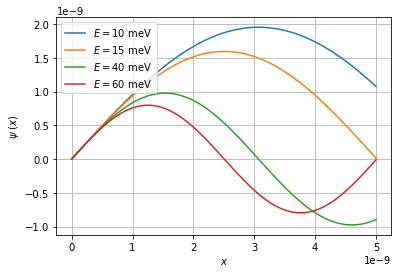

In [10]:
# parametros
a = 5e-9 # largura do poço
m = m_e
k = lambda E: sqrt(2*m*E)/hbar
N = 1000 # número total de pontos
h = a/N # passo
xs = np.linspace(0, a, N) # range da variável espacial

"""
EDO que desejamos resolver
"""
def f(r, x):
    R = r[0]
    S = r[1]
    fR = S
    fS = -R*2*m*E/hbar/hbar
    return np.array([fR, fS], float)

"""
funcao que devolve uma lista que corresponde as solucoes
da EDO dada por f, e com energia Ei, em cada ponto de xs

A solucao da EDO eh feita usado Runge-kutta de ordem 4
"""
def RK4(Ei):
    # R e S sao os valores iniciais (em xs[0]) da funcao e da sua derivada
    R = 0.
    S = 1
    r = np.array([R, S], float)
    
    global E
    E = Ei
    out = []
    for x in xs:
        out.append(r[0])
        k1 = h*f(r, x)
        k2 = h*f(r + .5*k1, x + .5*h)
        k3 = h*f(r + .5*k2, x + .5*h)
        k4 = h*f(r + k3, x + h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
    
    return out

# graficos para diferentes valores de energia
plt.plot(xs, RK4(10e-3*cte.e), label=r"$E = 10$ meV")
plt.plot(xs, RK4(15e-3*cte.e), label=r"$E = 15$ meV")
plt.plot(xs, RK4(40e-3*cte.e), label=r"$E = 40$ meV")
plt.plot(xs, RK4(60e-3*cte.e), label=r"$E = 60$ meV")
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$\psi\ (x)$")
plt.legend(loc = "upper left")
plt.savefig('shooting_method.svg')


E = lambda n: (hbar*n*pi/a)**2/2/m
print('valores exatos:', E(1)/1e-3/cte.e, E(2)/1e-3/cte.e)

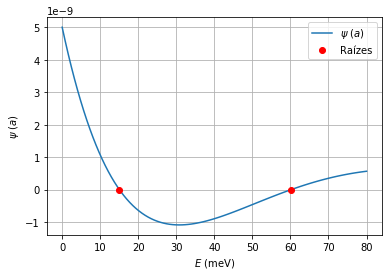

In [14]:
Erange = np.linspace(0, 80e-3*cte.e, 100) # range de valores de energia

"""
funcao que devolve uma lista que corresponde as solucoes
da EDO dada por f, e com energia Ei, em cada ponto de xs

A solucao da EDO eh feita usado Runge-kutta de ordem 4
"""
def RK4():
    # R e S sao os valores iniciais (em xs[0]) da funcao e da sua derivada
    R = 0.
    S = 1
    r = np.array([R, S], float)
    
    out = []
    for x in xs:
        out.append(r[0])
        k1 = h*f(r, x)
        k2 = h*f(r + .5*k1, x + .5*h)
        k3 = h*f(r + .5*k2, x + .5*h)
        k4 = h*f(r + k3, x + h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
    
    return out


"""
funcao que devolve uma o valor, em xs[-1], da funcao cuja
EDO eh dada por f.

A solucao da EDO eh feita usado Runge-kutta de ordem 4
"""
def solve(Ei):
    # R e S sao os valores iniciais (em xs[0]) da funcao e da sua derivada
    R = 0.
    S = 1
    r = np.array([R, S], float)
    
    global E
    E = Ei
    
    for x in xs:
        k1 = h*f(r, x)
        k2 = h*f(r + .5*k1, x + .5*h)
        k3 = h*f(r + .5*k2, x + .5*h)
        k4 = h*f(r + k3, x + h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6    
    return r[0]


"""
função que devolve a raíz de psi(a) entre dois pontos de energia E1 e E2, 
utilizando o método da secante
"""
def secante(E1, E2):
    global E
    E = E2
    
    max_psi = max(np.absolute(np.array(RK4(), float)))
    epsilon = max_psi/1e2 # precisão
    
    while abs(solve(E2)) > epsilon:
        E1, E2 = E2, E2 - solve(E2)*(E2 - E1)/(solve(E2) - solve(E1))
        E = E2
        max_psi = max(np.absolute(np.array(RK4(), float)))
        epsilon = max_psi/1e2
    return E2

"""
funcao que devolve uma lista com as raízes de psi(a), 
dada uma lista  x com um range da energia e uma lista y
com os valores de psi(a) para cada ponto de x
"""
def raizes(x, y):
    out = []
    
    for i in range(1, len(y)):
        if y[i]*y[i-1] < 0:
            raiz = secante(x[i-1], x[i])
            out.append(raiz)
    return np.array(out, float)

# graficos da variacao de psi(a) em funcao da energia e as suas raizes
psis = np.array([solve(Ei) for Ei in Erange], float)
plt.plot(Erange/1e-3/cte.e, psis, label=r'$\psi\ (a)$')
Es = raizes(Erange, psis)
plt.plot(Es/1e-3/cte.e, np.zeros(len(Es)), 'ro', label='Raízes')
plt.grid(True)
plt.xlabel(r"$E$" + ' (meV)')
plt.ylabel(r"$\psi\ (a)$")
plt.legend(loc="upper right")
plt.savefig('sm_raizes.svg')